<a href="https://colab.research.google.com/github/shashwat1998/YOLOv5_iddDataset/blob/master/YOLOv5_iddDataset_200epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Isabek/XmlToTxt
!git clone https://github.com/ultralytics/yolov5
!git clone https://github.com/shashwat1998/YOLOv5_iddDataset

Cloning into 'XmlToTxt'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 82 (delta 15), reused 25 (delta 12), pack-reused 43
Unpacking objects: 100% (82/82), done.
Cloning into 'yolov5'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1114 (delta 20), reused 26 (delta 11), pack-reused 1075
Receiving objects: 100% (1114/1114), 3.45 MiB | 6.12 MiB/s, done.
Resolving deltas: 100% (735/735), done.
Cloning into 'YOLOv5_iddDataset'...
remote: Enumerating objects: 845, done.
remote: Total 845 (delta 0), reused 0 (delta 0), pack-reused 845
Receiving objects: 100% (845/845), 513.16 MiB | 29.41 MiB/s, done.
Resolving deltas: 100% (404/404), done.


In [1]:
%cd yolov5
!pip install -U -r requirements.txt
%cd ..

/content/yolov5
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-5k7s65_d
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-5k7s65_d
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 2)) (0.29.20)
Requirement already up-to-date: numpy==1.17 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 3)) (1.17.0)
Requirement already up-to-date: opencv-python in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 4)) (4.3.0.36)
Requirement already up-to-date: torch>=1.4 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 5)) (1.5.1+cu101)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 6)) (3.2.2)
Requirement already up-to-date: pillow in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 7)) (7.2.0)
Requirement alre

In [2]:
%cd XmlToTxt
!pip install -U -r requirements.txt
%cd ..

/content/XmlToTxt
/content


In [3]:
!cp -rf XmlToTxt/* ./

In [4]:
!cp -rf YOLOv5_iddDataset/* ./

In [5]:
!python xmltotxt.py -xml labels/val -out labels/val1

In [6]:
!python xmltotxt.py -xml labels/train -out labels/train1

In [7]:
!rm -rf labels/train
!rm -rf labels/val

In [8]:
!mv labels/val1 labels/val
!mv labels/train1 labels/train

In [9]:
!mkdir -p idd

In [10]:
!cp -rf images ./idd/images/

In [11]:
!cp -rf labels ./idd/labels/

In [13]:
%cd yolov5/

/content/yolov5


In [16]:
!python train.py --batch 16 --epochs 200 --data ./data/idd.yaml --cfg ./models/yolov5s.yaml --weights ''

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='./data/idd.yaml', device='', epochs=200, evolve=False, img_size=[640, 640], multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-07-07 04:15:13.599514: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/


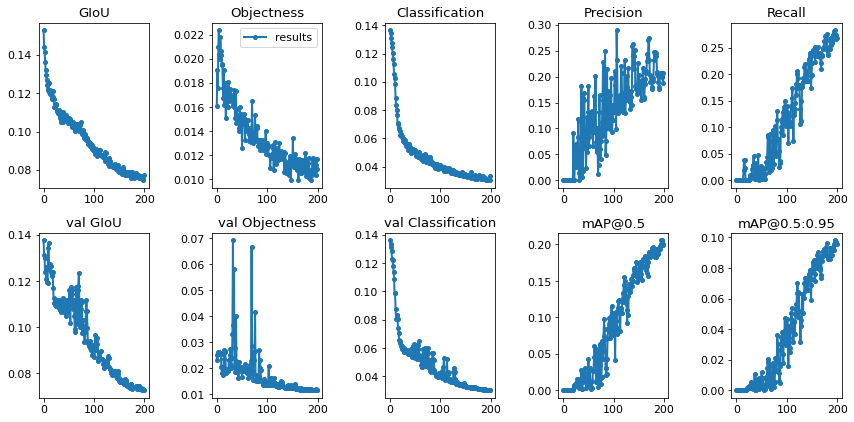

In [18]:
from utils.utils import plot_results
plot_results()

In [19]:
!python test.py --weights weights/last.pt --data ./data/idd.yaml --img 640 --verbose

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/idd.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=False, single_cls=False, task='val', verbose=True, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Fusing layers... Model Summary: 140 layers, 7.28428e+06 parameters, 6.61683e+06 gradients
Caching labels /content/idd/labels/val (208 found, 0 missing, 0 empty, 0 duplicate, for 208 images): 100% 208/208 [00:00<00:00, 1104.76it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 7/7 [00:10<00:00,  1.54s/it]
                 all         208    1.17e+03       0.207       0.269       0.201      0.0987
             bicycle         208          34       0.726      0.0796         0.2       0.072
                 bus         208          43       0.146       0.395       0.152      0.0855
        traffic sign         208           7 

In [20]:
!python test.py --weights weights/best.pt --data ./data/idd.yaml --img 640 --verbose

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/idd.yaml', device='', img_size=640, iou_thres=0.65, merge=False, save_json=False, single_cls=False, task='val', verbose=True, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Fusing layers... Model Summary: 140 layers, 7.28428e+06 parameters, 6.61683e+06 gradients
Caching labels /content/idd/labels/val (208 found, 0 missing, 0 empty, 0 duplicate, for 208 images): 100% 208/208 [00:00<00:00, 5664.34it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 7/7 [00:11<00:00,  1.58s/it]
                 all         208    1.17e+03       0.197       0.294       0.205      0.0987
             bicycle         208          34       0.681       0.235       0.218      0.0803
                 bus         208          43       0.138       0.442       0.195      0.0935
        traffic sign         208           7 

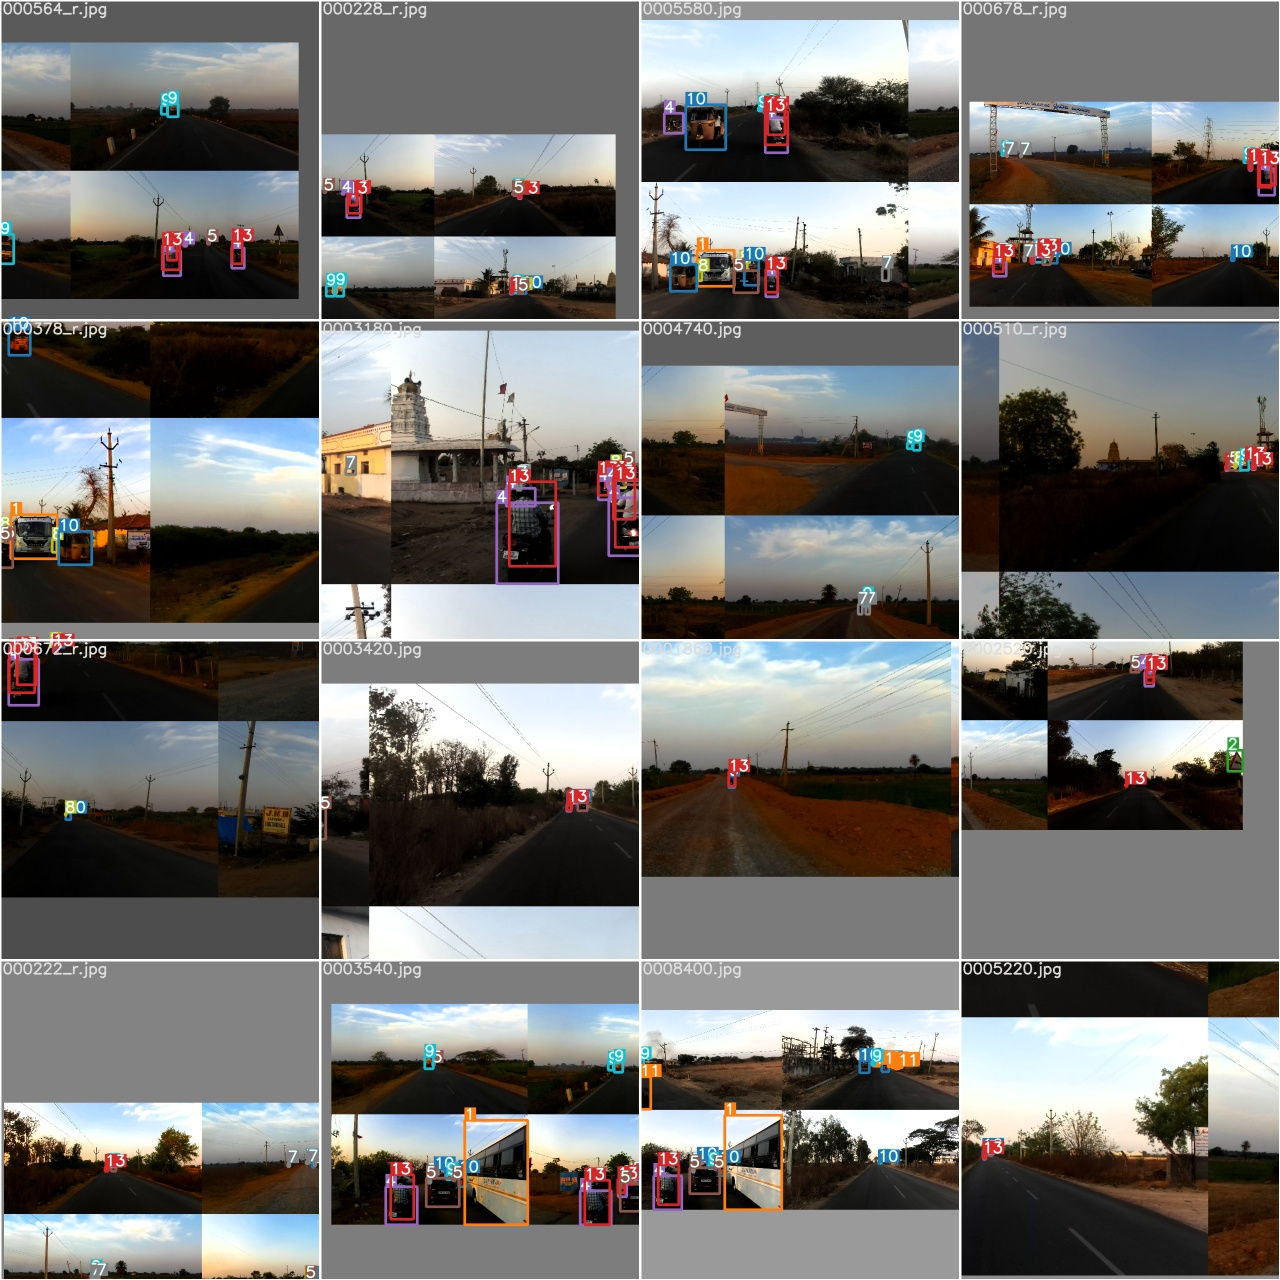

In [21]:
from IPython.display import Image, clear_output  # to display images
Image(filename='./train_batch0.jpg', width=900)

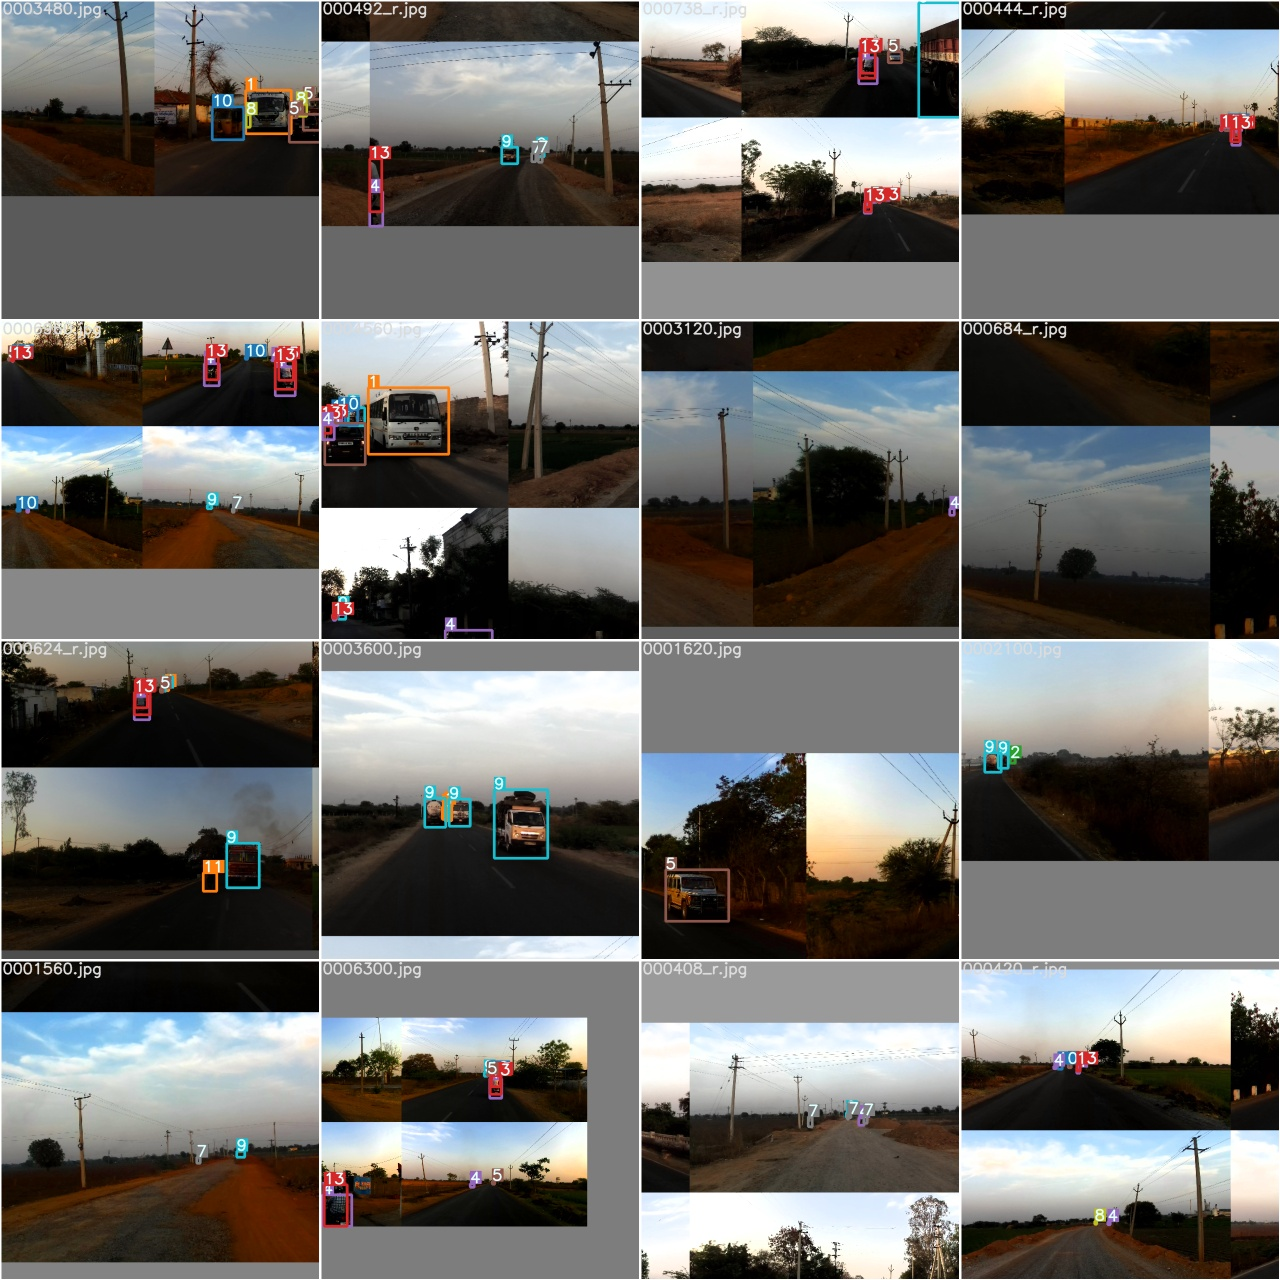

In [22]:
Image(filename='./train_batch1.jpg', width=900)

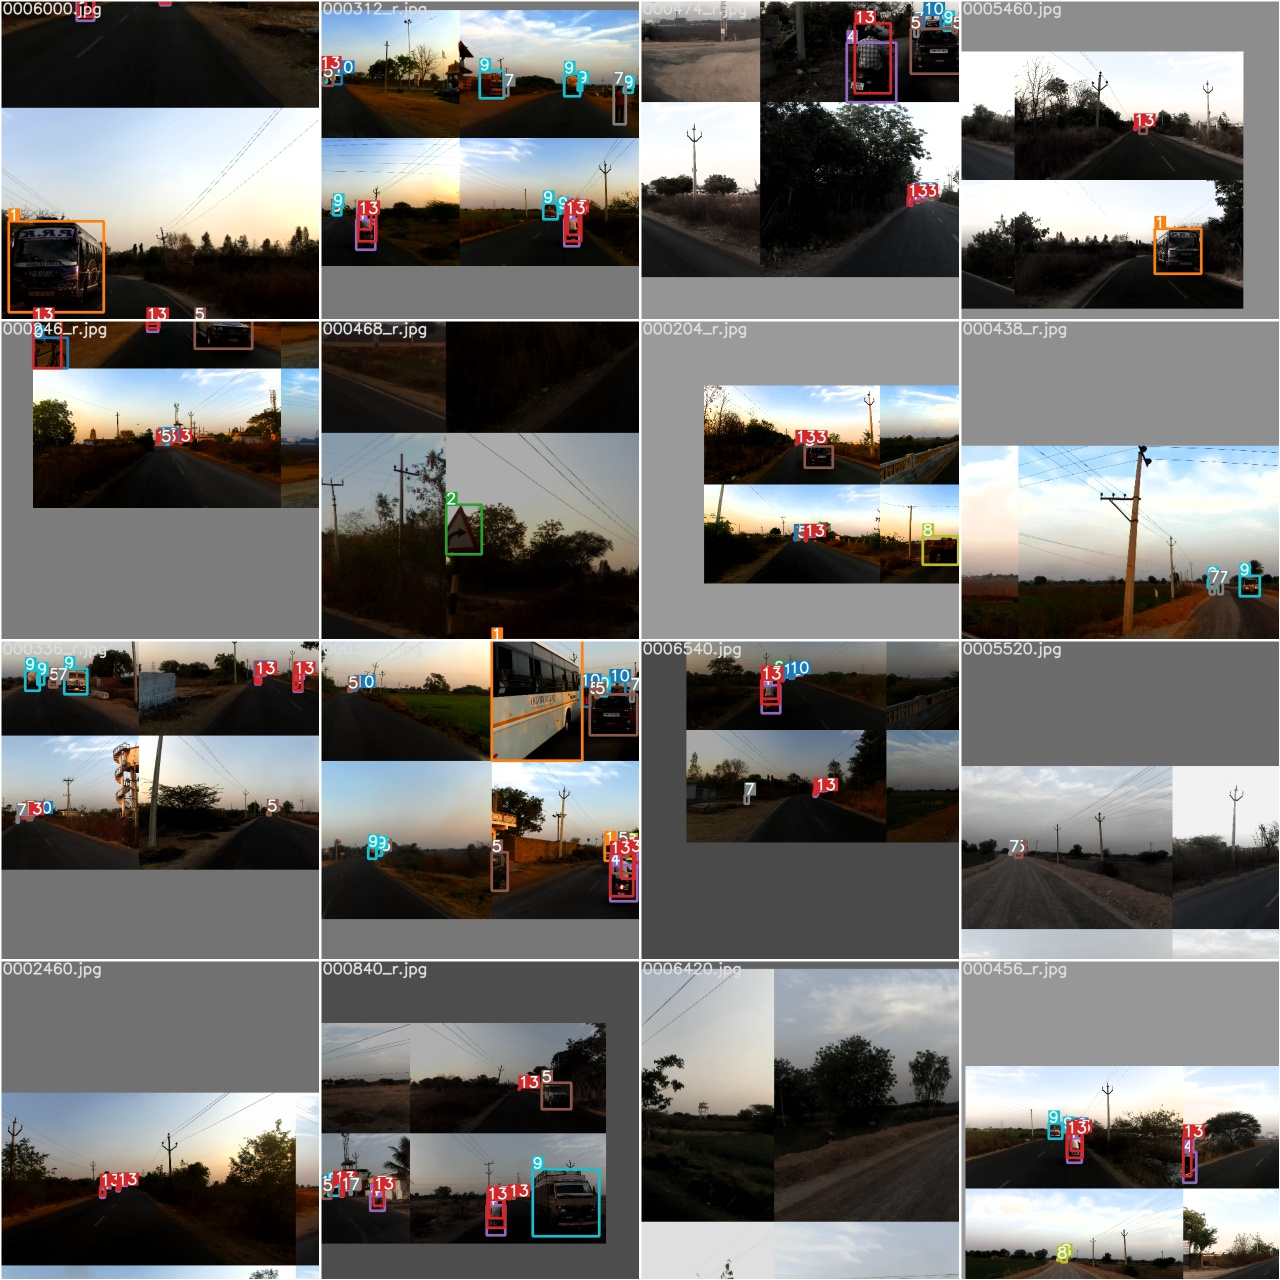

In [35]:

Image(filename='./train_batch2.jpg', width=900)

In [26]:
!python detect.py --weights weights/best.pt --img 640 --source /content/idd/images/train --conf-thres 0.3

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.3, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/idd/images/train', update=False, view_img=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

image 1/208 /content/idd/images/train/0000420.jpg: 384x640 Done. (0.017s)
image 2/208 /content/idd/images/train/0001020.jpg: 384x640 Done. (0.016s)
image 3/208 /content/idd/images/train/000102_r.jpg: 384x640 Done. (0.016s)
image 4/208 /content/idd/images/train/0001260.jpg: 384x640 6 trucks, Done. (0.016s)
image 5/208 /content/idd/images/train/0001320.jpg: 384x640 Done. (0.015s)
image 6/208 /content/idd/images/train/0001440.jpg: 384x640 3 trucks, Done. (0.016s)
image 7/208 /content/idd/images/train/000144_r.jpg: 384x640 1 motorcycles, 2 riders, Done. (0.017s)
image 8/208 /content/idd/images/train/0001500.jpg: 384x640 1 motorcycles, 1 riders, Done. (

In [45]:
import os
directory = '/content/yolov5/inference/output'
for filename in os.listdir(directory):
  if filename.endswith(".jpg"):
    filen = 'inference/output/'+filename
    Image(filename=filen, width=900)
    print(filen)
#Image(filename='inference/output/0004080.jpg', width=900)

inference/output/000564_r.jpg
inference/output/000378_r.jpg
inference/output/000672_r.jpg
inference/output/000222_r.jpg
inference/output/000228_r.jpg
inference/output/0003180.jpg
inference/output/0003420.jpg
inference/output/0003540.jpg
inference/output/0005580.jpg
inference/output/0004740.jpg
inference/output/0001860.jpg
inference/output/0008400.jpg
inference/output/000678_r.jpg
inference/output/000510_r.jpg
inference/output/0002520.jpg
inference/output/0005220.jpg
inference/output/0003480.jpg
inference/output/0006960.jpg
inference/output/000624_r.jpg
inference/output/0001560.jpg
inference/output/000492_r.jpg
inference/output/0004560.jpg
inference/output/0003600.jpg
inference/output/0006300.jpg
inference/output/000738_r.jpg
inference/output/0003120.jpg
inference/output/0001620.jpg
inference/output/000408_r.jpg
inference/output/000444_r.jpg
inference/output/000684_r.jpg
inference/output/0002100.jpg
inference/output/000420_r.jpg
inference/output/0006000.jpg
inference/output/000246_r.jpg